# Plotting and learning

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# Fonctions pour afficher le séparateur d'un classifieur
def mesh_predictions(predfun,boundaries=None,step=200):
    if boundaries is None:
        xminmax,yminmax = plt.gca().get_xlim() , plt.gca().get_ylim()
    else:
        xminmax,yminmax = boundaries
    xlist = np.linspace(*xminmax, num=step)
    ylist = np.linspace(*yminmax, num=step)
    X, Y = np.meshgrid(xlist, ylist)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = predfun(XX)
    Z = Z.reshape(X.shape)
    return X,Y,Z

def plot_separator(predfun,step=350,**kwargs):
    XX,YY,ZZ = mesh_predictions(predfun,step=step)
    plt.contour(XX,YY,ZZ,**kwargs)

# plot functions
def scatter(X,y):
    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')


def save_xlim_ylim():
    save_xlim_ylim.xl = plt.gca().get_xlim()
    save_xlim_ylim.yl = plt.gca().get_ylim()

def restore_xlim_ylim():
    plt.gca().set_xlim(save_xlim_ylim.xl)
    plt.gca().set_ylim(save_xlim_ylim.yl)


In [3]:
# Generate 2 gaussians blobs
X0,y0 = make_blobs(n_samples=100,centers=[[6,6]])
X1,y1 = make_blobs(n_samples=100,centers=[[7,7]])
y1 += 1
X = np.vstack((X0,X1))
y = np.hstack((y0,y1))

In [4]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

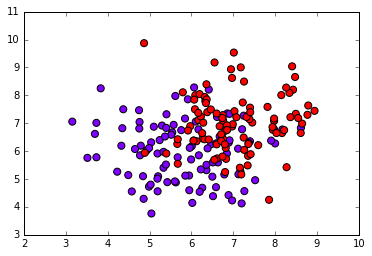

In [5]:
# plot points first
scatter(X,y)

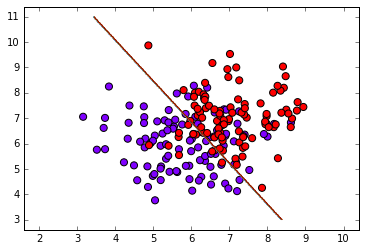

In [6]:
scatter(X,y)
plot_separator(logreg.predict)